In [16]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

# INPUT Layer: Input shape of the model as 224x224 pixels with a single channel (grayscale image)
input_shape = Input((224,224,1)) 

## First Convolutional block
## conv1 and conv2: Two convolutional layers with 64 filters, each with a 3x3 kernel, 
##                  and "same" padding (meaning the output size is the same as the input size). 
##                  The ReLU activation function is applied.
## pool1: A max-pooling layer that reduces the size of the feature map by a factor of 2 (224x224 -> 112x112)
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(input_shape)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

## Second Convolutional block
## Similar to the first block, but with 128 filters. The pooling layer further reduces the size to 56x56
conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

## Third Convolutional block
## This block has three convolutional layers with 256 filters, followed by a max-pooling layer that reduces the size to 28x28
conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

## Fourth Convolutional block
## This block has three convolutional layers with 512 filters, followed by a max-pooling layer that reduces the size to 14x14
conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

## Fifth Convolutional block
## This block, like the fourth, has three convolutional layers with 512 filters and a max-pooling layer that reduces the size to 7x7
conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

## Fully connected layers
## flat: Flattens the pooled feature map from the last convolutional block into a 1D vector.
## dense1 and dense2: Two fully connected layers with 4096 units each and ReLU activation.
## output: The final output layer with 1000 units (representing 1000 possible classes) and a softmax activation, providing class probabilities.
flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

## Instantiate the model
## Combines the input and output layers to define the VGG16 model structure
vgg16_model  = Model(inputs=input_shape, outputs=output)

### load_image()
* Function that loads an image from the specified path 
* Resizes it to 224x224 pixels (the input size required by VGG16) 
* Converts it to a NumPy array, adds an extra dimension to match the model's expected input shape 
* And preprocesses it for the VGG16 model 
* The preprocessed image is returned

### get_predictions()
* Function takes a pre-trained VGG16 model as input and performs the following steps:
* Creates a plot with 4 subplots (f, ax = plt.subplots(1, 4)), with a large size for visibility.
* Loads and resizes each image in imgs to 200x200 pixels using Image.open(imgs[i]).resize((200, 200))
* Displays them in the subplots using ax[i].imshow()

In [25]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 


img1 = "./test_data/cat.1.jpg"
img2 = "./test_data/dog.11900.jpg"
img3 = "./test_data/dates.jpg"
img4 = "./test_data/toyota_yaris.jpg"
#img4 = "./test_data/raspberries11.jpg"
#img4 = "./test_data/Bananas(lady_finger)3.jpg"

imgs = [img1, img2, img3, img4]

def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200)))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

* Function provided by Keras to instantiate the VGG16 model architecture, which is a popular convolutional neural network architecture used for image classification tasks
* Load pre-trained wights from ImageNet
* The _get_predictions function will then:
* 1. Load the set of images specified earlier.
* 2. Preprocess these images to be compatible with the VGG16 model.
* 3. Use the model to make predictions on these images.
* 4. Display the images and create bar plots showing the top 3 predicted classes and their associated probabilities.

### VGG16
- VGG16 is a deep convolutional neural network with 16 weight layers, developed by the Visual Geometry Group (VGG) at Oxford.
- It uses small 3x3 convolutional filters and ReLU activation functions, followed by max-pooling layers to reduce spatial dimensions.
- The model has three fully connected layers, with the final layer outputting probabilities across 1000 classes (e.g., for ImageNet).
- VGG16 has around 138 million parameters, making it computationally expensive and requiring significant processing power.
- It achieved top performance in the 2014 ImageNet competition, making it a benchmark model for image classification tasks.
- The model is widely used for transfer learning, where pre-trained weights are adapted for other tasks in computer vision.
- While highly accurate, VGG16’s large model size and computational demands are considered its primary drawbacks.

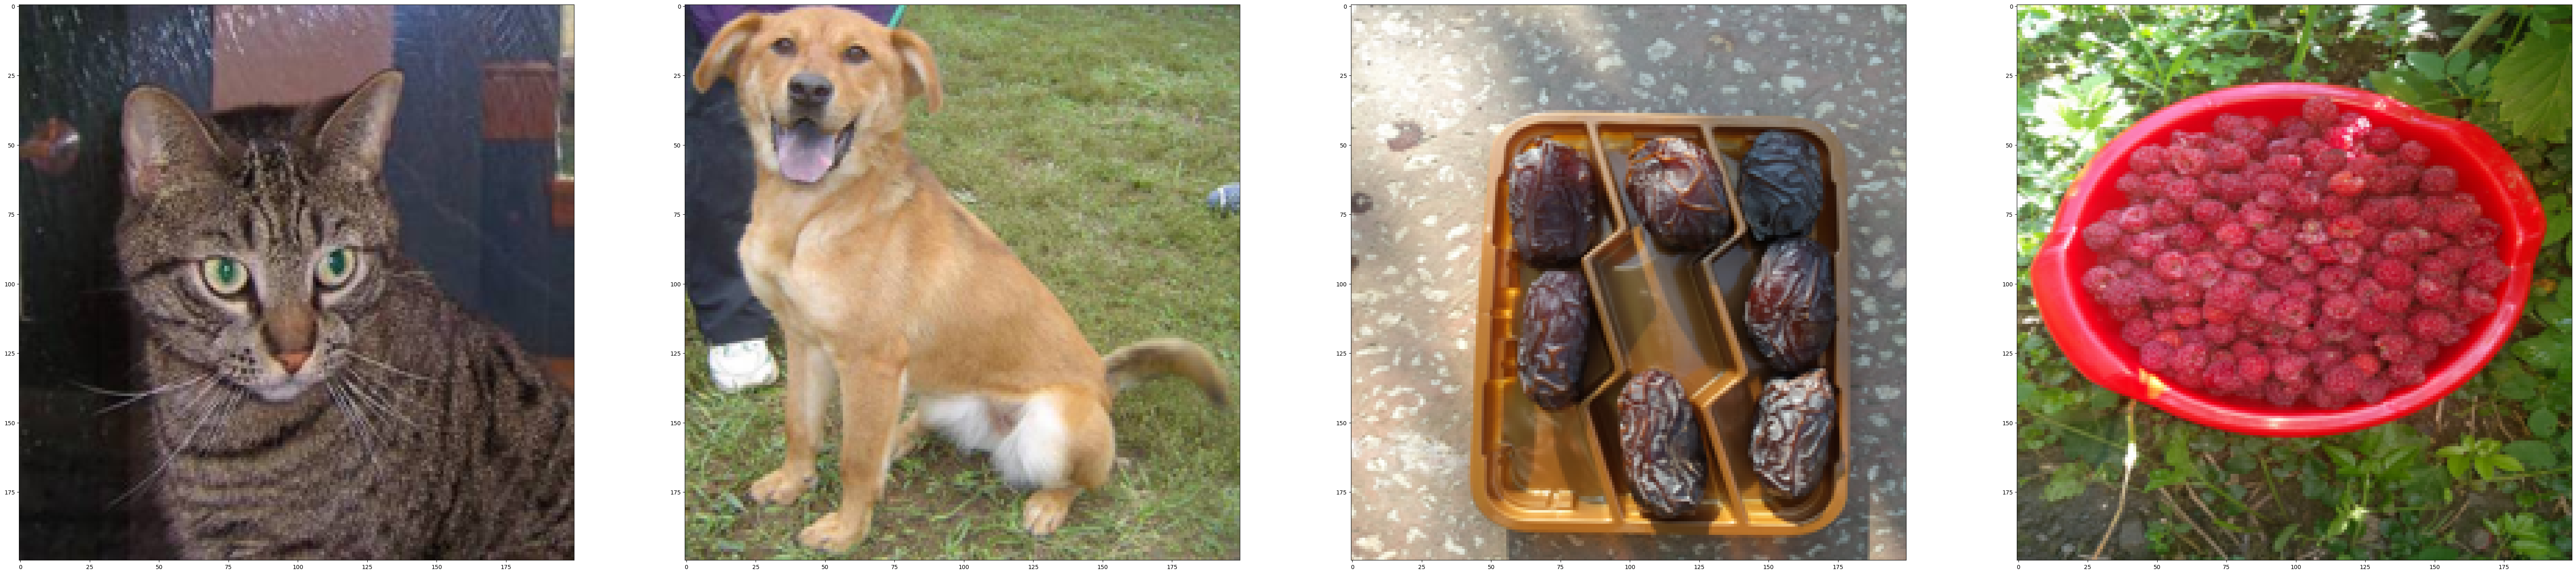

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


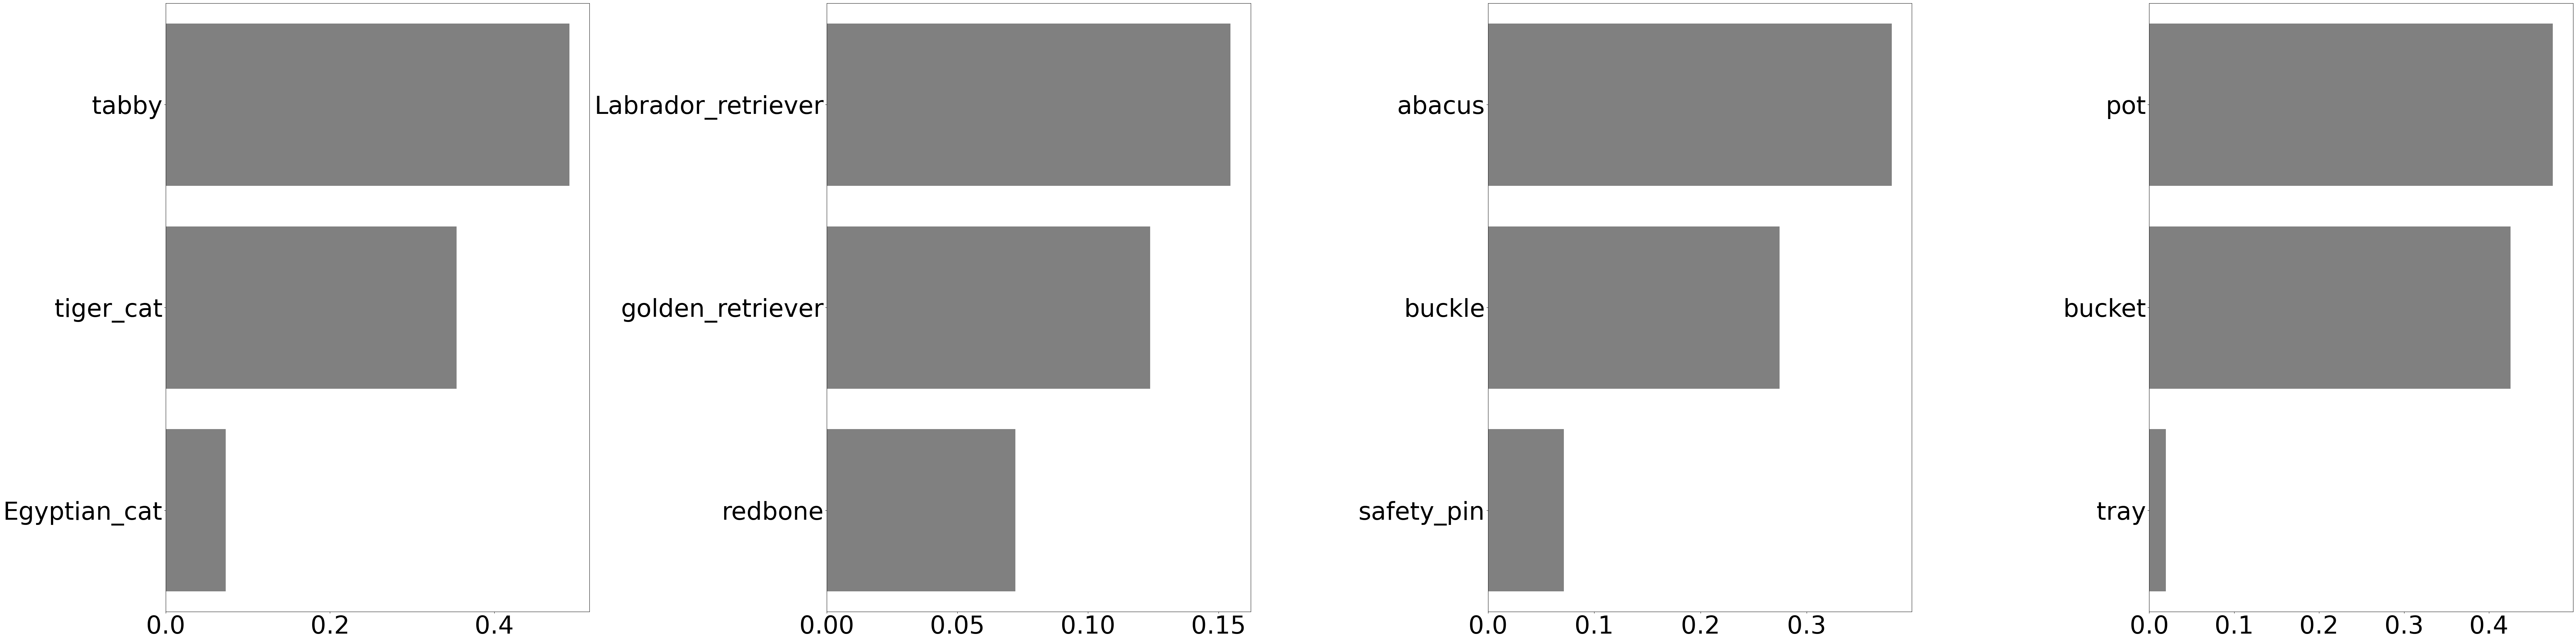

In [26]:
from keras.applications.vgg16 import VGG16

## vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'

## Load the VGG16 model with pre-trained weights from ImageNet
vgg16_model = VGG16(weights='imagenet')
get_predictions(vgg16_model)

## VGG19

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 166s 0us/step


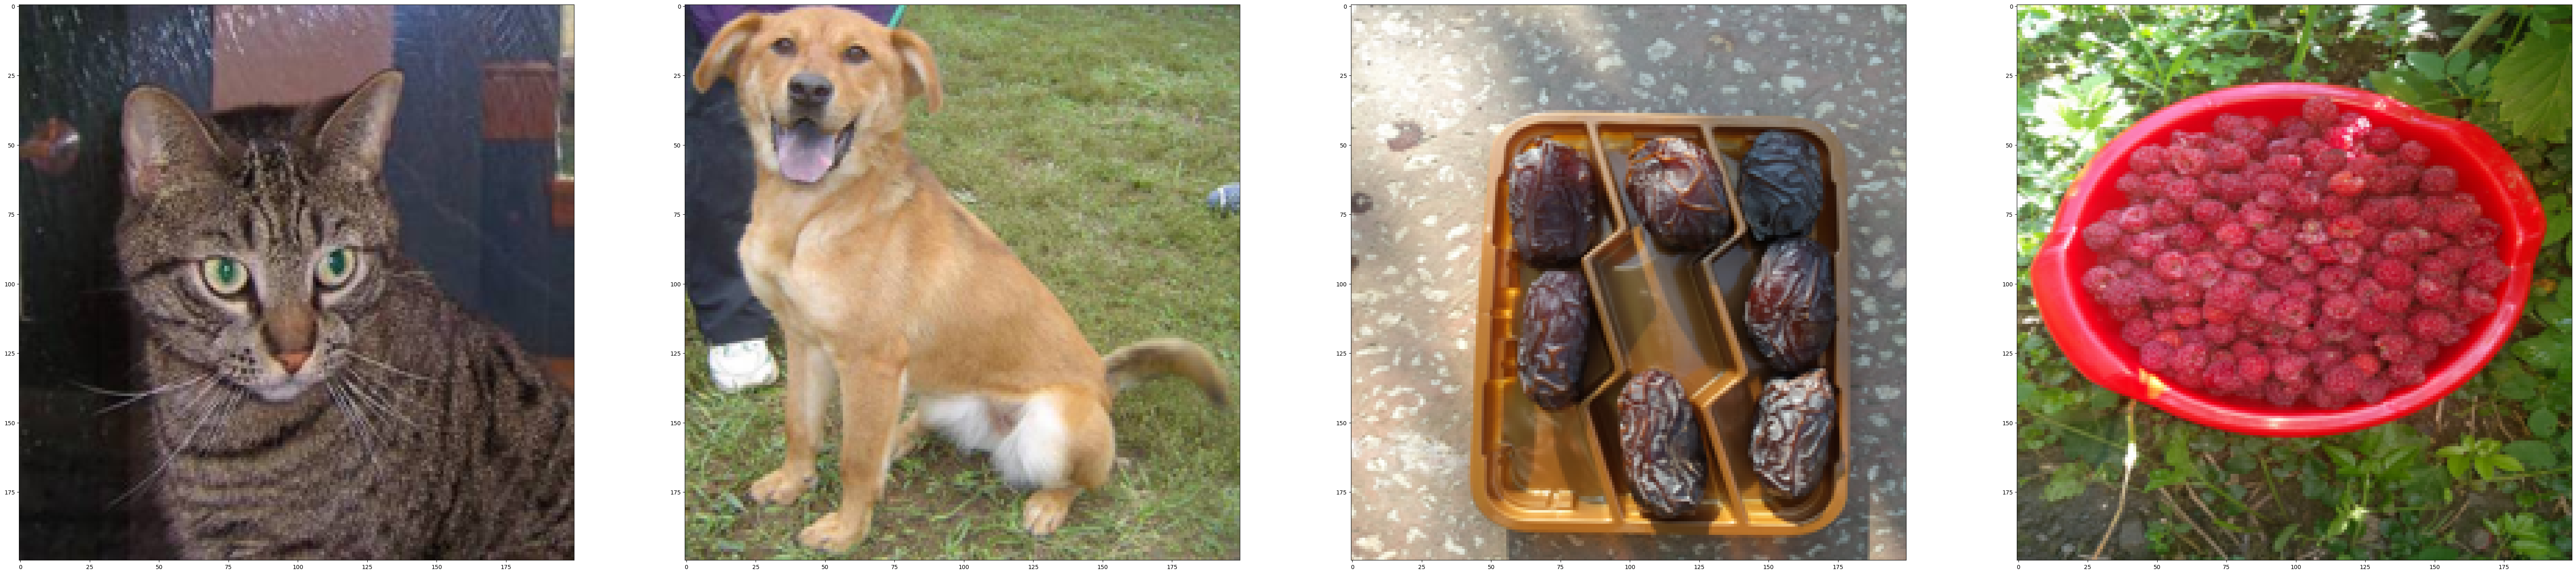

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


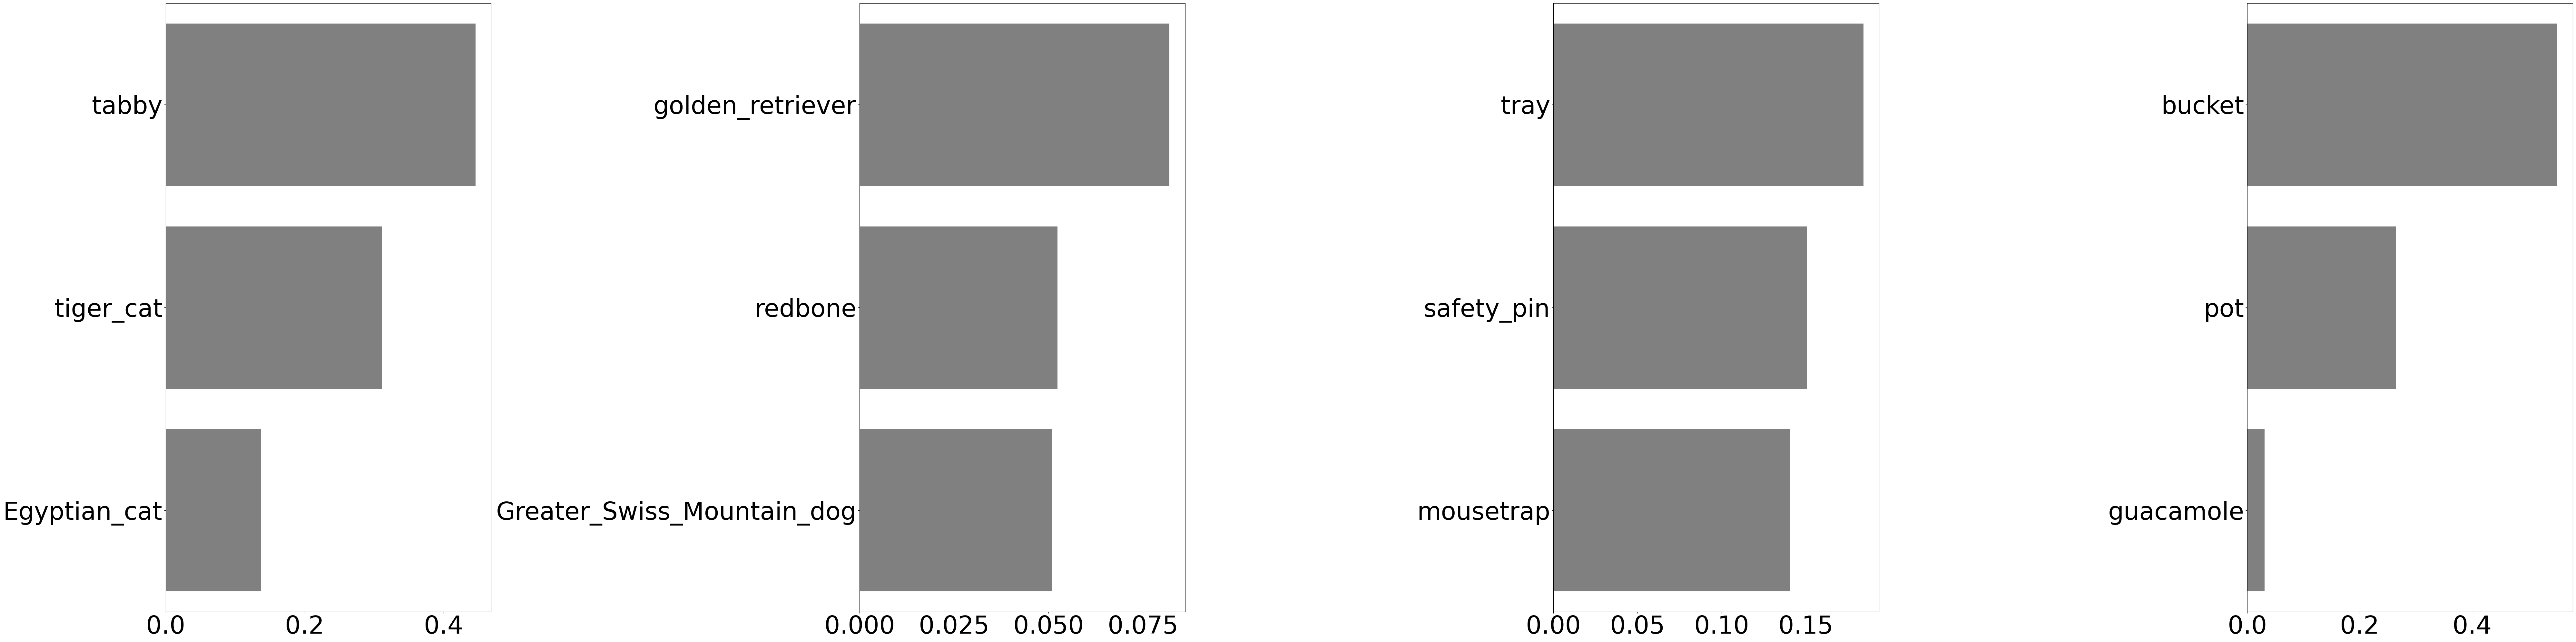

In [30]:
from keras.applications.vgg19 import VGG19

## Load the VGG16 model with pre-trained weights from ImageNet
vgg19_model = VGG19(weights='imagenet')
get_predictions(vgg19_model)